
<center>
<h1 style="font-size: 50px;">Intelligent Vassle Fuel Consumption Prediction</h1>
</center>

---


<center>
<img  src="images/vassel.webp" width="500" height="200">
<center/>


# Import Modules

In [109]:
# Pandas Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# M.L Modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Pickle Module
import pickle


# Creating Dataframe

In [110]:
df = pd.read_csv('data/BRAVERUS_20150101_TO_20181231.csv')
#Creating copy of the DF
df_cpy=df.copy()

In [111]:
df_cpy.head()

,VESSEL,VOYAGE,DATED,TO,STEAM,RPM,SPEED,STW,M/E HFO CONS,M/E LSHFO CONS,...,BOIL LSMGO CONS,WIND,SWELL,SLIP,CUR SPD,DRAFT FOR,DRAFT AFT,OBS DIST,OPERATION,CARGOCARRIED
0,BRAVERUS,201805L,31/12/2018,SINGAPORE PEGBC,24.00,69.0,10.37,11.38,35.3,0.0,...,0.0,5.0,2.0,17.41,1.0,16.0,16.36,249.0,NaN,0.0
1,BRAVERUS,201805L,30/12/2018,SINGAPORE PEGBC,23.00,69.1,9.86,11.07,34.5,0.0,...,0.0,5.0,2.2,21.56,1.2,16.0,16.36,227.0,NaN,0.0
2,BRAVERUS,201805L,29/12/2018,SINGAPORE PEGBC,24.00,70.1,10.20,11.21,35.8,0.0,...,0.0,6.0,2.0,20.03,1.0,16.0,16.36,245.0,NaN,0.0
3,BRAVERUS,201805L,28/12/2018,SINGAPORE PEGBC,23.00,70.0,11.08,11.49,35.3,0.0,...,0.0,5.0,1.5,13.02,0.4,16.0,16.36,255.0,NaN,0.0
4,BRAVERUS,201805L,27/12/2018,SINGAPORE PEGBC,23.83,69.8,10.74,11.49,35.5,0.0,...,0.0,5.0,1.5,14.29,0.6,16.0,16.36,256.0,NaN,0.0


In [112]:
df_cpy.describe()

,STEAM,RPM,SPEED,STW,M/E HFO CONS,M/E LSHFO CONS,M/E MDO CONS,M/E LSMDO CONS,M/E MGO CONS,M/E LSMGO CONS,...,BOIL MGO CONS,BOIL LSMGO CONS,WIND,SWELL,SLIP,CUR SPD,DRAFT FOR,DRAFT AFT,OBS DIST,CARGOCARRIED
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.0,1659.0,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,13.777185,41.693189,6.853484,4.672508,17.926944,0.058529,0.0,0.0,0.001326,0.075769,...,0.055154,0.025919,2.634720,0.913924,5.261615,0.368475,11.347390,12.337914,147.034358,67754.626281
std,11.384132,37.712443,5.957006,5.465947,15.568897,1.039917,0.0,0.0,0.039118,1.168181,...,0.273148,0.206624,2.284716,1.188726,9.022482,0.482580,5.063872,4.360546,123.583772,77387.104925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-99.990000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,8.400000,0.000000,0.000000
50%,24.000000,58.300000,9.910000,0.000000,16.500000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.500000,0.400000,0.200000,8.450000,10.750000,210.700000,0.000000
75%,24.000000,69.000000,11.050000,10.800000,34.300000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,4.000000,1.500000,11.550000,0.500000,17.640000,17.700000,261.000000,166860.000000
max,25.000000,693.900000,88.720000,15.080000,53.900000,25.400000,0.0,0.0,1.500000,34.600000,...,3.000000,2.600000,9.000000,8.000000,91.790000,5.000000,17.800000,18.530000,377.000000,167928.000000


In [113]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VESSEL           1659 non-null   object 
 1   VOYAGE           1659 non-null   object 
 2   DATED            1659 non-null   object 
 3   TO               1659 non-null   object 
 4   STEAM            1659 non-null   float64
 5   RPM              1659 non-null   float64
 6   SPEED            1659 non-null   float64
 7   STW              1659 non-null   float64
 8   M/E HFO CONS     1659 non-null   float64
 9   M/E LSHFO CONS   1659 non-null   float64
 10  M/E MDO CONS     1659 non-null   float64
 11  M/E LSMDO CONS   1659 non-null   float64
 12  M/E MGO CONS     1659 non-null   float64
 13  M/E LSMGO CONS   1659 non-null   float64
 14  D/G HFO CONS     1659 non-null   float64
 15  D/G LSHFO CONS   1659 non-null   float64
 16  D/G MDO CONS     1659 non-null   float64
 17  D/G LSMDO CONS

# Data cleaning


In [114]:
columns_to_drop=[]
for col in df_cpy.columns:
    if (df_cpy[col].nunique() == 1):
        columns_to_drop.append(col)
columns_to_drop

['VESSEL',
 'M/E MDO CONS',
 'M/E LSMDO CONS',
 'D/G MDO CONS',
 'D/G LSMDO CONS',
 'BOIL MDO CONS',
 'BOIL LSMDO CONS']

In [115]:
df_cpy.drop(columns=columns_to_drop, axis=1,inplace=True)

In [116]:
df_cpy.duplicated().sum()

0

In [117]:
df_cpy.isna().sum()

VOYAGE                0
DATED                 0
TO                    0
STEAM                 0
RPM                   0
SPEED                 0
STW                   0
M/E HFO CONS          0
M/E LSHFO CONS        0
M/E MGO CONS          0
M/E LSMGO CONS        0
D/G HFO CONS          0
D/G LSHFO CONS        0
D/G MGO CONS          0
D/G LSMGO CONS        0
BOIL HFO CONS         0
BOIL SHFO CONS        0
BOIL MGO CONS         0
BOIL LSMGO CONS       0
WIND                  0
SWELL                 0
SLIP                  0
CUR SPD               0
DRAFT FOR             0
DRAFT AFT             0
OBS DIST              0
OPERATION          1052
CARGOCARRIED          0
dtype: int64

In [118]:
df_cpy['OPERATION'] = df_cpy['OPERATION'].fillna(df_cpy['OPERATION'].mode()[0])

In [119]:
df_cpy.dtypes

VOYAGE              object
DATED               object
TO                  object
STEAM              float64
RPM                float64
SPEED              float64
STW                float64
M/E HFO CONS       float64
M/E LSHFO CONS     float64
M/E MGO CONS       float64
M/E LSMGO CONS     float64
D/G HFO CONS       float64
D/G LSHFO CONS     float64
D/G MGO CONS       float64
D/G LSMGO CONS     float64
BOIL HFO CONS      float64
BOIL SHFO CONS     float64
BOIL MGO CONS      float64
BOIL LSMGO CONS    float64
WIND               float64
SWELL              float64
SLIP               float64
CUR SPD            float64
DRAFT FOR          float64
DRAFT AFT          float64
OBS DIST           float64
OPERATION           object
CARGOCARRIED       float64
dtype: object

In [120]:
df_cpy['DATED'] = pd.to_datetime(df_cpy['DATED'], format="%d/%m/%Y")

In [121]:
df_cpy['OPERATION'].unique()

array(['DISCHARGING', 'TRANSIT', 'LOADING', 'BUNKERING', 'IDLE',
       'DRYDOCKING'], dtype=object)

In [122]:
OPERATION_encoder = LabelEncoder()
df_cpy['OPERATION']=OPERATION_encoder.fit_transform(df_cpy['OPERATION'])

In [123]:
df_cpy['VOYAGE'].unique()

array(['201805L', '201805B', '201804L', '201803L', '201803B', '201802L',
       '201802B', '201801L', '201801B', '201709L', '201709B', '201708L',
       '201708B', '201707L', '201707B', '201706L', '201706B', '201705L',
       '201705B', '201704B', '201704L', '201703L', '201703B', '201702L',
       '201702B', '201701L', '201701B', '201607L', '201607B', '201606L',
       '201606B', '201605L', '201605B', '201604L', '201604B', '201603L',
       '201603B', '201602L', '201602B', '201601L', '201601B', '201508L',
       '201508B', '201507L', '201507B', '201506L', '201506B', '201505L',
       '201505B', '201504L', '201504B', '201503L', '201503B', '201502B',
       '201502L', '201501B', '201501L', '201408L'], dtype=object)

In [124]:
VOYAGE_encoder = LabelEncoder()
df_cpy['VOYAGE']=VOYAGE_encoder.fit_transform(df_cpy['VOYAGE'])

In [125]:
df_cpy['TO'].unique()

array(['SINGAPORE PEGBC', 'SUEZ CANAL', 'PORT SAID', 'GIBRALTAR',
       'NOUADHIBOU', 'CAPE AGULHAS', 'SINGAPORE', 'CAOFEIDIAN',
       'DARDANELLES', 'BOSPORUS', 'YUZHNY', 'QINGDAO', 'NORFOLK',
       'DUNKIRK', 'ROTTERDAM', 'HAY POINT', 'ABBOT POINT', 'UNKNOWN',
       'TIANJIN', 'PORT HEDLAND', 'ZHUSHAN', 'JIANGYIN', 'LIANYUNGANG',
       'HONG KONG', 'DAMPIER', 'JINGTANG', 'SINGAPORE OPL', 'RIZHAO',
       'DALIAN', 'TAICANG', 'BEILUN', 'SINGAPORE EOPL', 'ZHOUSHAN',
       'RUGAO', 'LUMUT TRMT', 'LANSHAN', 'FANGCHENG OPL', 'FANGCHENG',
       'HONG KONG OPL', 'HAILI'], dtype=object)

In [126]:
TO_encoder = LabelEncoder()
df_cpy['TO']=TO_encoder.fit_transform(df_cpy['TO'])

## Creating Target Columns

In [127]:
target='Total Fuel Consumption'
fuel_types = [col for col in df_cpy.columns if col.endswith('CONS')]
df_cpy[target] = df_cpy[fuel_types].sum(axis=1)
df_cpy.drop(columns=fuel_types,inplace=True)

In [128]:
df_cpy.head(3)

,VOYAGE,DATED,TO,STEAM,RPM,SPEED,STW,WIND,SWELL,SLIP,CUR SPD,DRAFT FOR,DRAFT AFT,OBS DIST,OPERATION,CARGOCARRIED,Total Fuel Consumption
0,57,2018-12-31,32,24.0,69.0,10.37,11.38,5.0,2.0,17.41,1.0,16.0,16.36,249.0,1,0.0,37.8
1,57,2018-12-30,32,23.0,69.1,9.86,11.07,5.0,2.2,21.56,1.2,16.0,16.36,227.0,1,0.0,37.1
2,57,2018-12-29,32,24.0,70.1,10.20,11.21,6.0,2.0,20.03,1.0,16.0,16.36,245.0,1,0.0,38.2


## Outlier analysis and handling

In [129]:
numeric_columns = df_cpy.select_dtypes(include=['float64', 'int64','int32']).columns

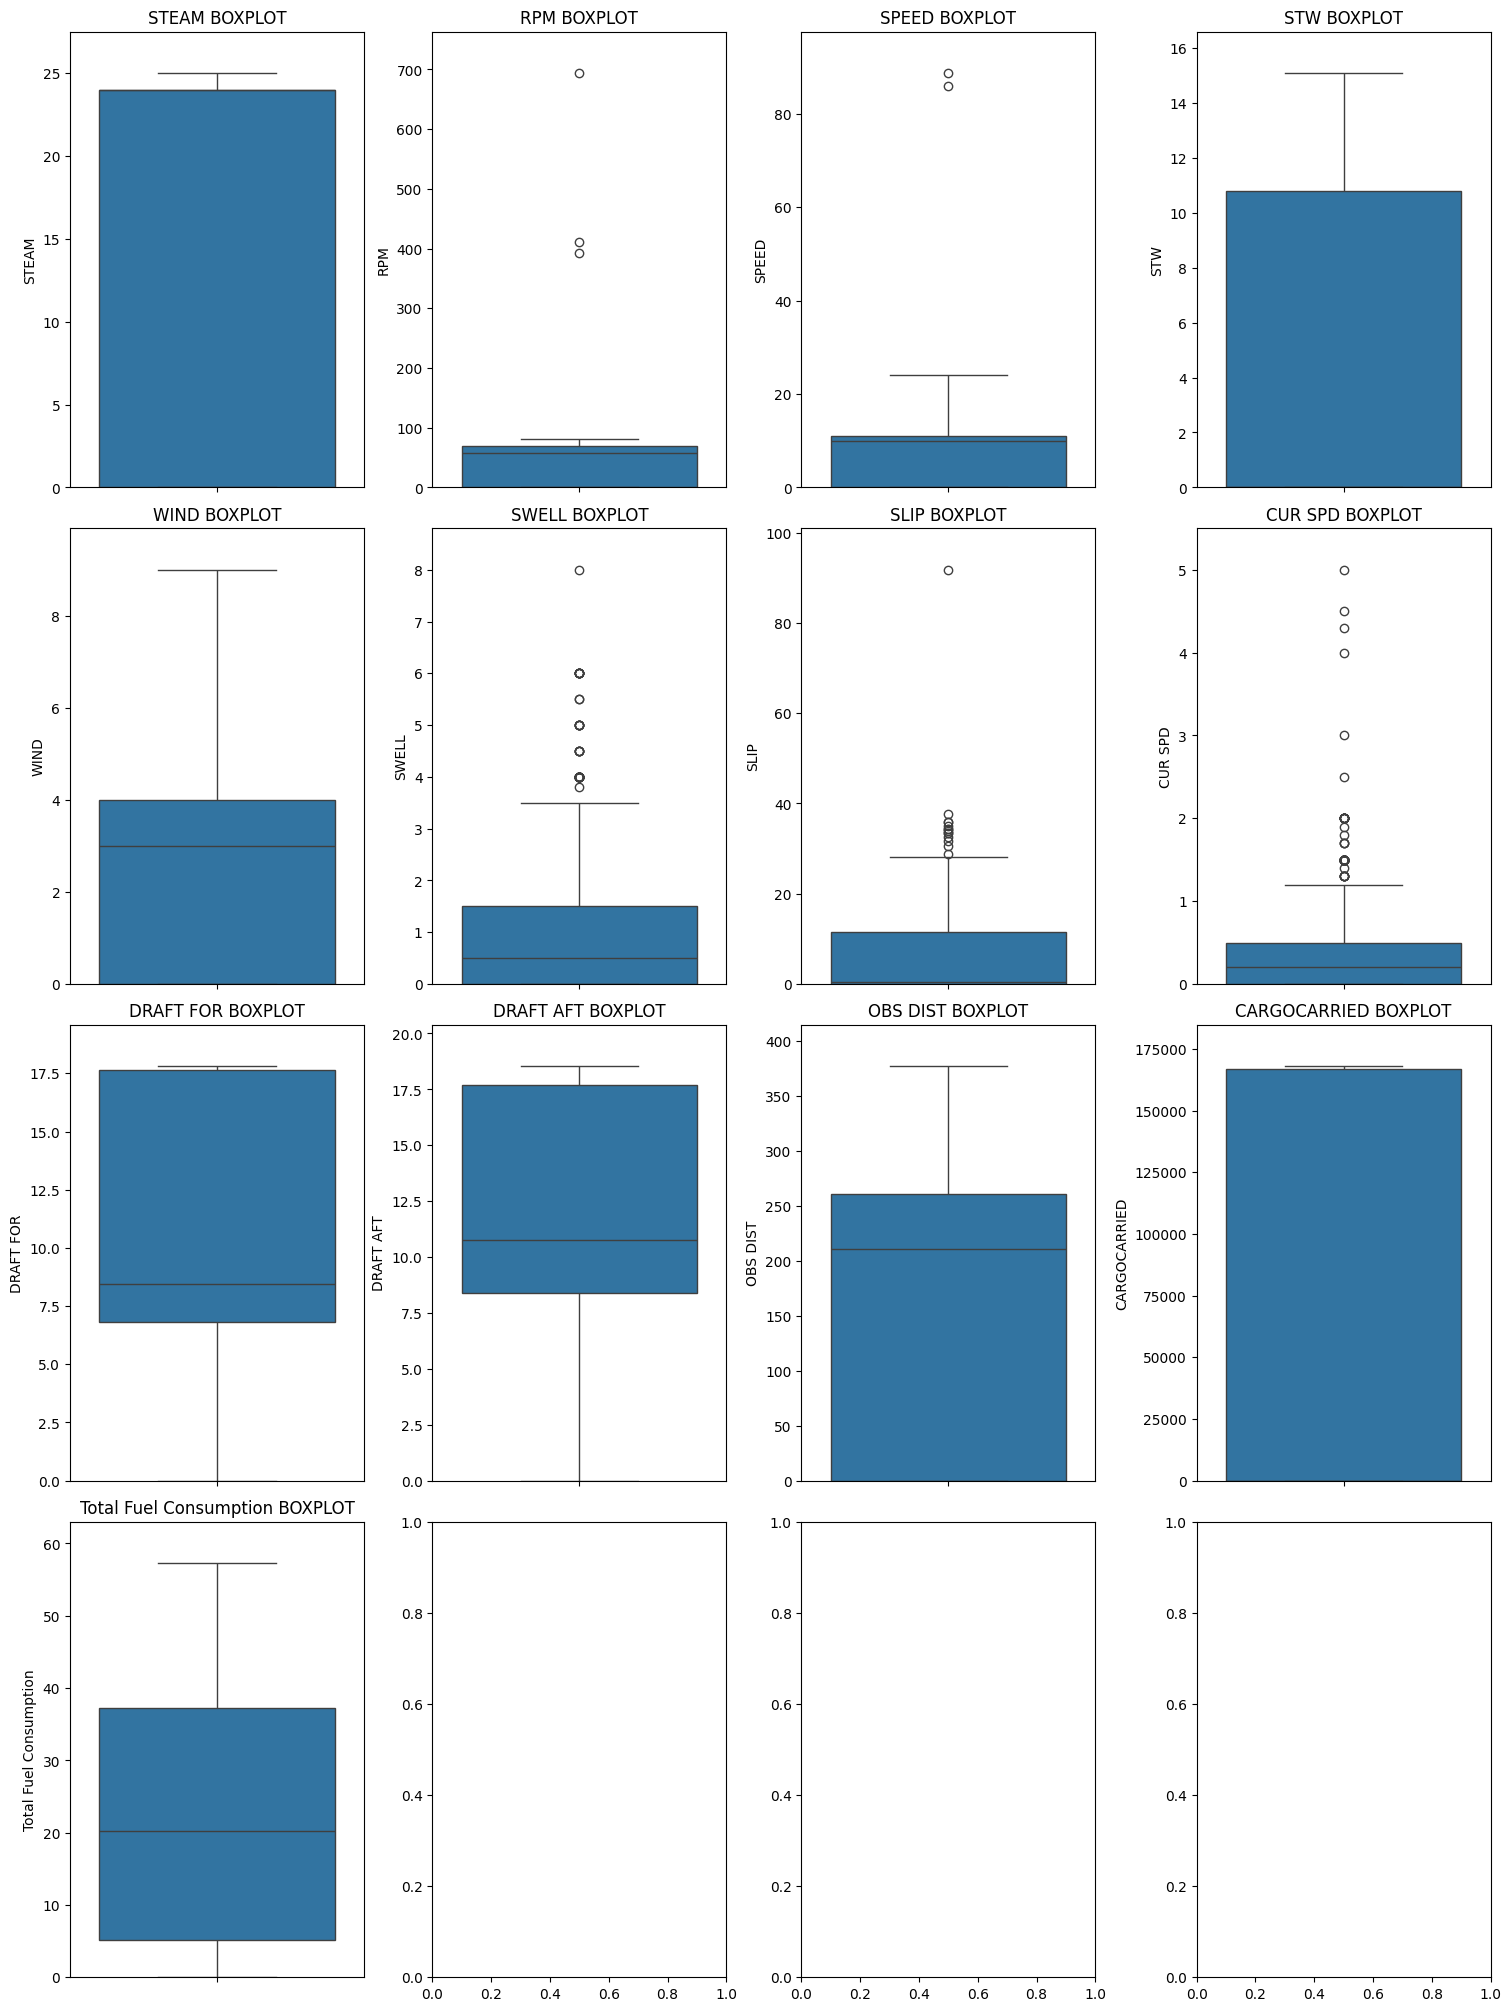

In [130]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate([col for col in numeric_columns if col not in {'OPERATION','VOYAGE','TO'}]):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num] if len(numeric_columns) > 1 else axes[col_num]
    
    sns.boxplot(y=df_cpy[col], ax=ax)
    ax.set_title(f'{col} BOXPLOT')
    ax.set_ylim(bottom=0, top=df_cpy[col].max() * 1.10)  

In [131]:
df_cpy.describe()

,VOYAGE,DATED,TO,STEAM,RPM,SPEED,STW,WIND,SWELL,SLIP,CUR SPD,DRAFT FOR,DRAFT AFT,OBS DIST,OPERATION,CARGOCARRIED,Total Fuel Consumption
count,1659.000000,1659,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,30.381555,2016-12-26 09:38:04.990958336,23.205546,13.777185,41.693189,6.853484,4.672508,2.634720,0.913924,5.261615,0.368475,11.347390,12.337914,147.034358,1.444244,67754.626281,21.376492
min,0.000000,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2015-12-26 12:00:00,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,8.400000,0.000000,1.000000,0.000000,5.200000
50%,30.000000,2016-12-28 00:00:00,23.000000,24.000000,58.300000,9.910000,0.000000,3.000000,0.500000,0.400000,0.200000,8.450000,10.750000,210.700000,1.000000,0.000000,20.200000
75%,48.000000,2017-12-24 12:00:00,29.000000,24.000000,69.000000,11.050000,10.800000,4.000000,1.500000,11.550000,0.500000,17.640000,17.700000,261.000000,1.000000,166860.000000,37.200000
max,57.000000,2018-12-31 00:00:00,39.000000,25.000000,693.900000,88.720000,15.080000,9.000000,8.000000,91.790000,5.000000,17.800000,18.530000,377.000000,5.000000,167928.000000,57.300000
std,18.039052,NaN,9.876099,11.384132,37.712443,5.957006,5.465947,2.284716,1.188726,9.022482,0.482580,5.063872,4.360546,123.583772,1.115629,77387.104925,15.298156


In [132]:
columns_with_outliers = ['RPM', 'SLIP', 'SPEED', 'WIND', 'CUR SPD', 'STW', 'SWELL']

for col in columns_with_outliers:
    Q1 = df_cpy[col].quantile(0.25)
    Q3 = df_cpy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cpy=df_cpy[(df_cpy[col] >= lower_bound) & (df_cpy[col] <= upper_bound)]


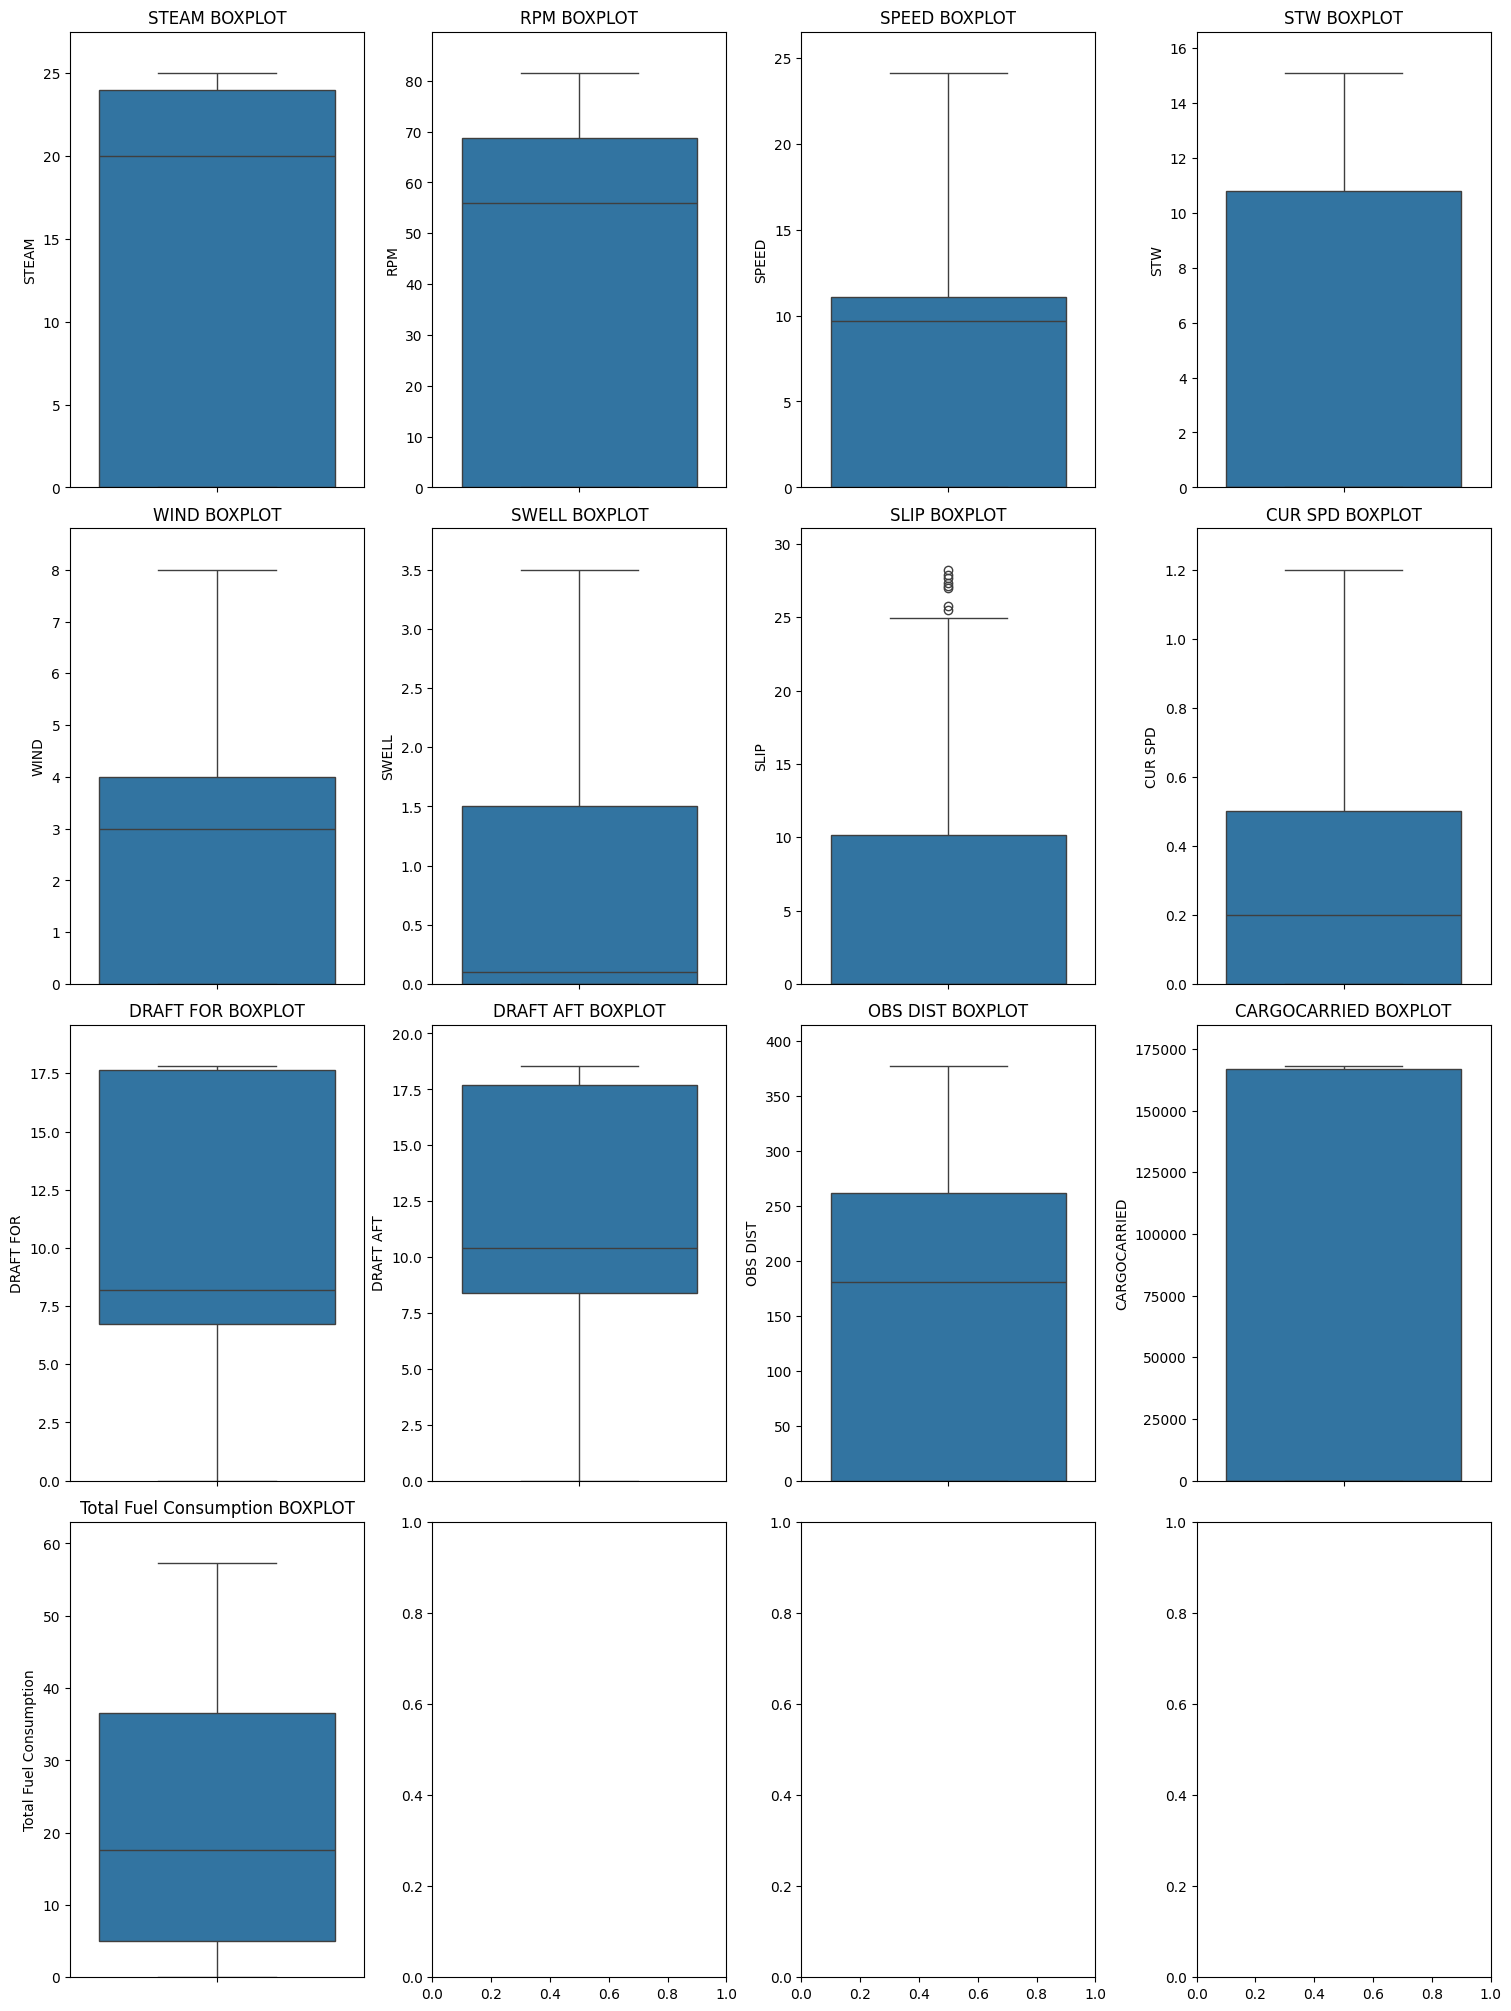

In [133]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate([col for col in numeric_columns if col not in {'OPERATION','VOYAGE','TO'}]):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num] if len(numeric_columns) > 1 else axes[col_num]
    
    sns.boxplot(y=df_cpy[col], ax=ax)
    ax.set_title(f'{col} BOXPLOT')
    ax.set_ylim(bottom=0, top=df_cpy[col].max() * 1.10)  

# Exploratory Data Analysis -> EDA

<Axes: title={'center': 'Total Fuel Consumption Over Time'}, xlabel='DATED'>

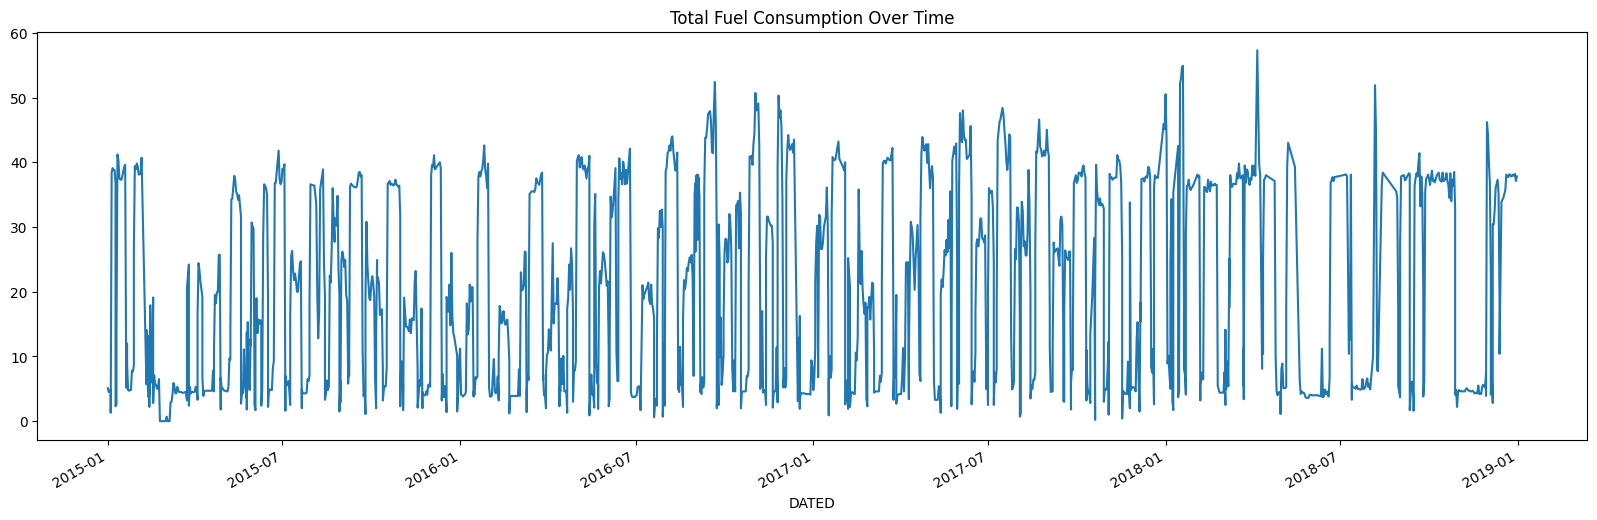

In [134]:
df_cpy.set_index('DATED')['Total Fuel Consumption'].plot(figsize=(20,6),title="Total Fuel Consumption Over Time")

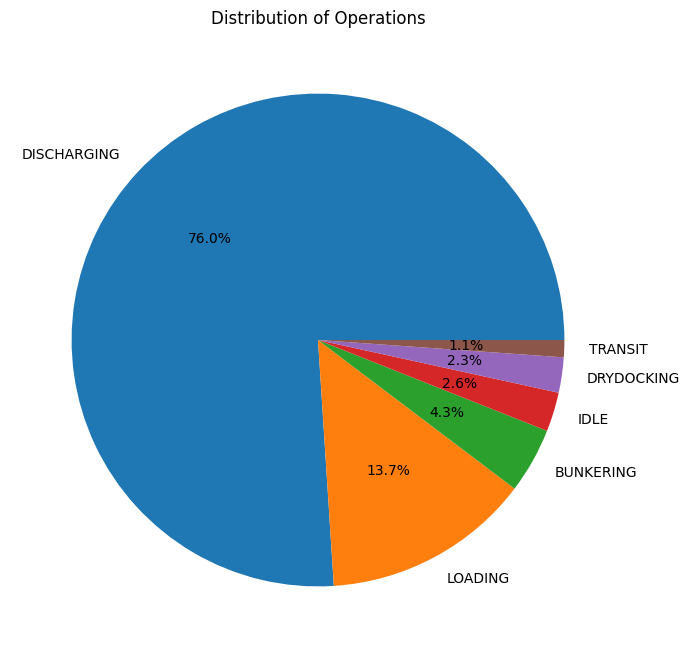

In [135]:
decoded_labels = OPERATION_encoder.inverse_transform(df_cpy['OPERATION'])
operation_counts = pd.Series(decoded_labels).value_counts()

plt.figure(figsize=(8,8))
plt.pie(operation_counts, labels=operation_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Operations')
plt.show()

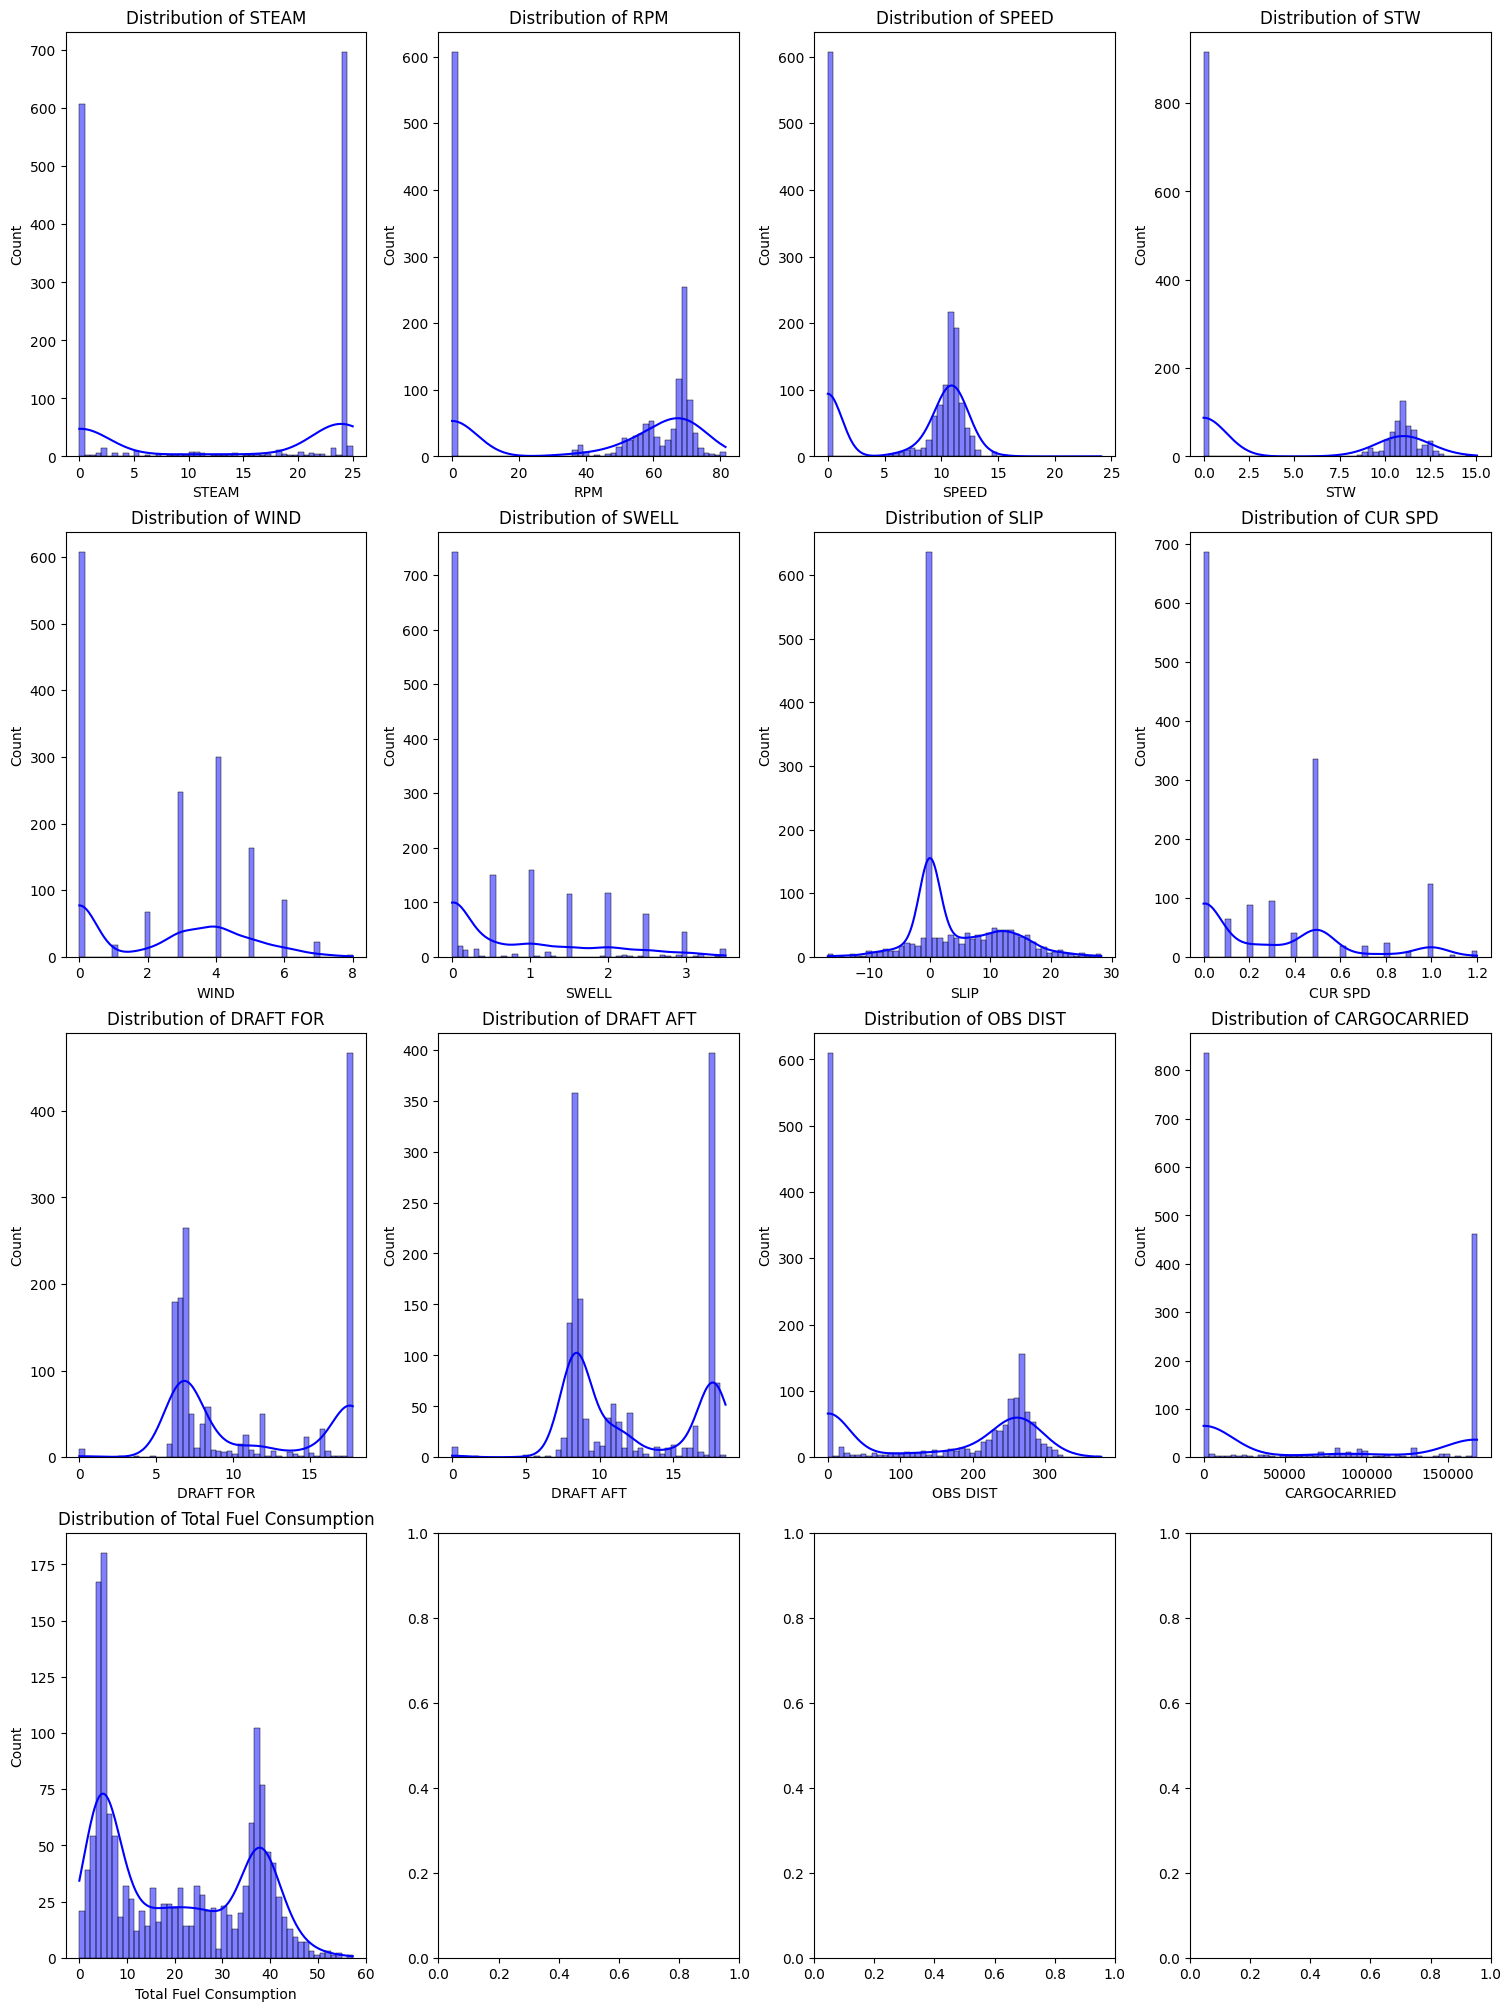

In [136]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20), constrained_layout=True)

for i, col in enumerate([col for col in numeric_columns if col not in {'OPERATION','VOYAGE','TO'}]):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]

    sns.histplot(df_cpy[col], bins=50, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Count')
plt.show()

## correlation Check

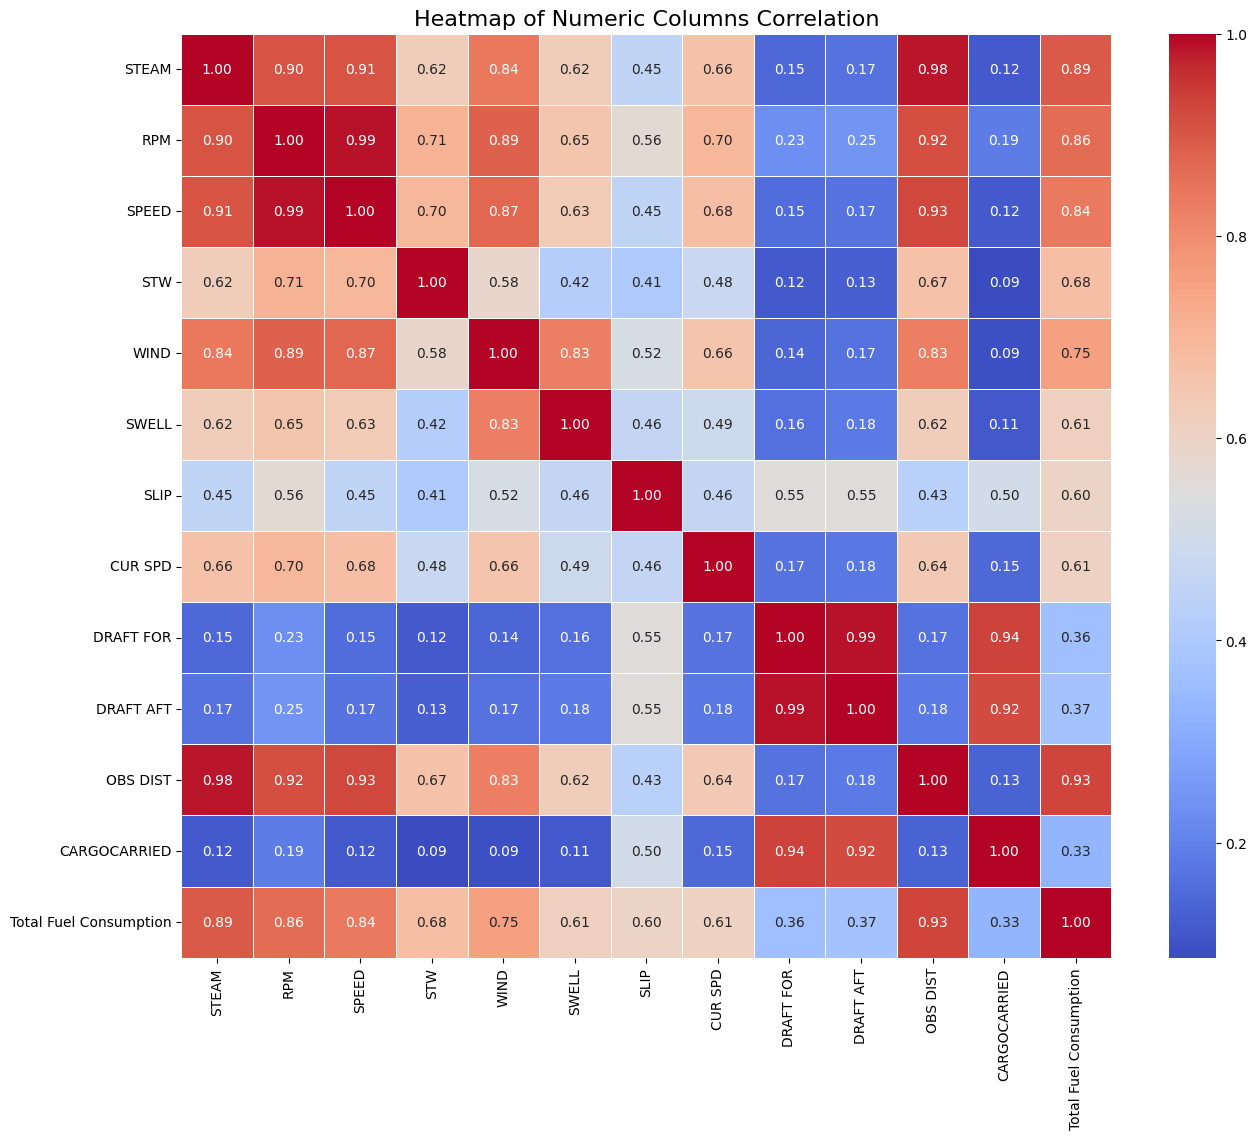

In [137]:

corr_matrix = df_cpy[numeric_columns].drop(columns=['OPERATION','VOYAGE','TO']).corr()
plt.figure(figsize=(15, 12))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)
plt.title('Heatmap of Numeric Columns Correlation', fontsize=16)
plt.show()


In [138]:
corr_matrix=corr_matrix.round(2)
corr_matrix

,STEAM,RPM,SPEED,STW,WIND,SWELL,SLIP,CUR SPD,DRAFT FOR,DRAFT AFT,OBS DIST,CARGOCARRIED,Total Fuel Consumption
STEAM,1.00,0.90,0.91,0.62,0.84,0.62,0.45,0.66,0.15,0.17,0.98,0.12,0.89
RPM,0.90,1.00,0.99,0.71,0.89,0.65,0.56,0.70,0.23,0.25,0.92,0.19,0.86
SPEED,0.91,0.99,1.00,0.70,0.87,0.63,0.45,0.68,0.15,0.17,0.93,0.12,0.84
STW,0.62,0.71,0.70,1.00,0.58,0.42,0.41,0.48,0.12,0.13,0.67,0.09,0.68
WIND,0.84,0.89,0.87,0.58,1.00,0.83,0.52,0.66,0.14,0.17,0.83,0.09,0.75
SWELL,0.62,0.65,0.63,0.42,0.83,1.00,0.46,0.49,0.16,0.18,0.62,0.11,0.61
SLIP,0.45,0.56,0.45,0.41,0.52,0.46,1.00,0.46,0.55,0.55,0.43,0.50,0.60
CUR SPD,0.66,0.70,0.68,0.48,0.66,0.49,0.46,1.00,0.17,0.18,0.64,0.15,0.61
DRAFT FOR,0.15,0.23,0.15,0.12,0.14,0.16,0.55,0.17,1.00,0.99,0.17,0.94,0.36
DRAFT AFT,0.17,0.25,0.17,0.13,0.17,0.18,0.55,0.18,0.99,1.00,0.18,0.92,0.37


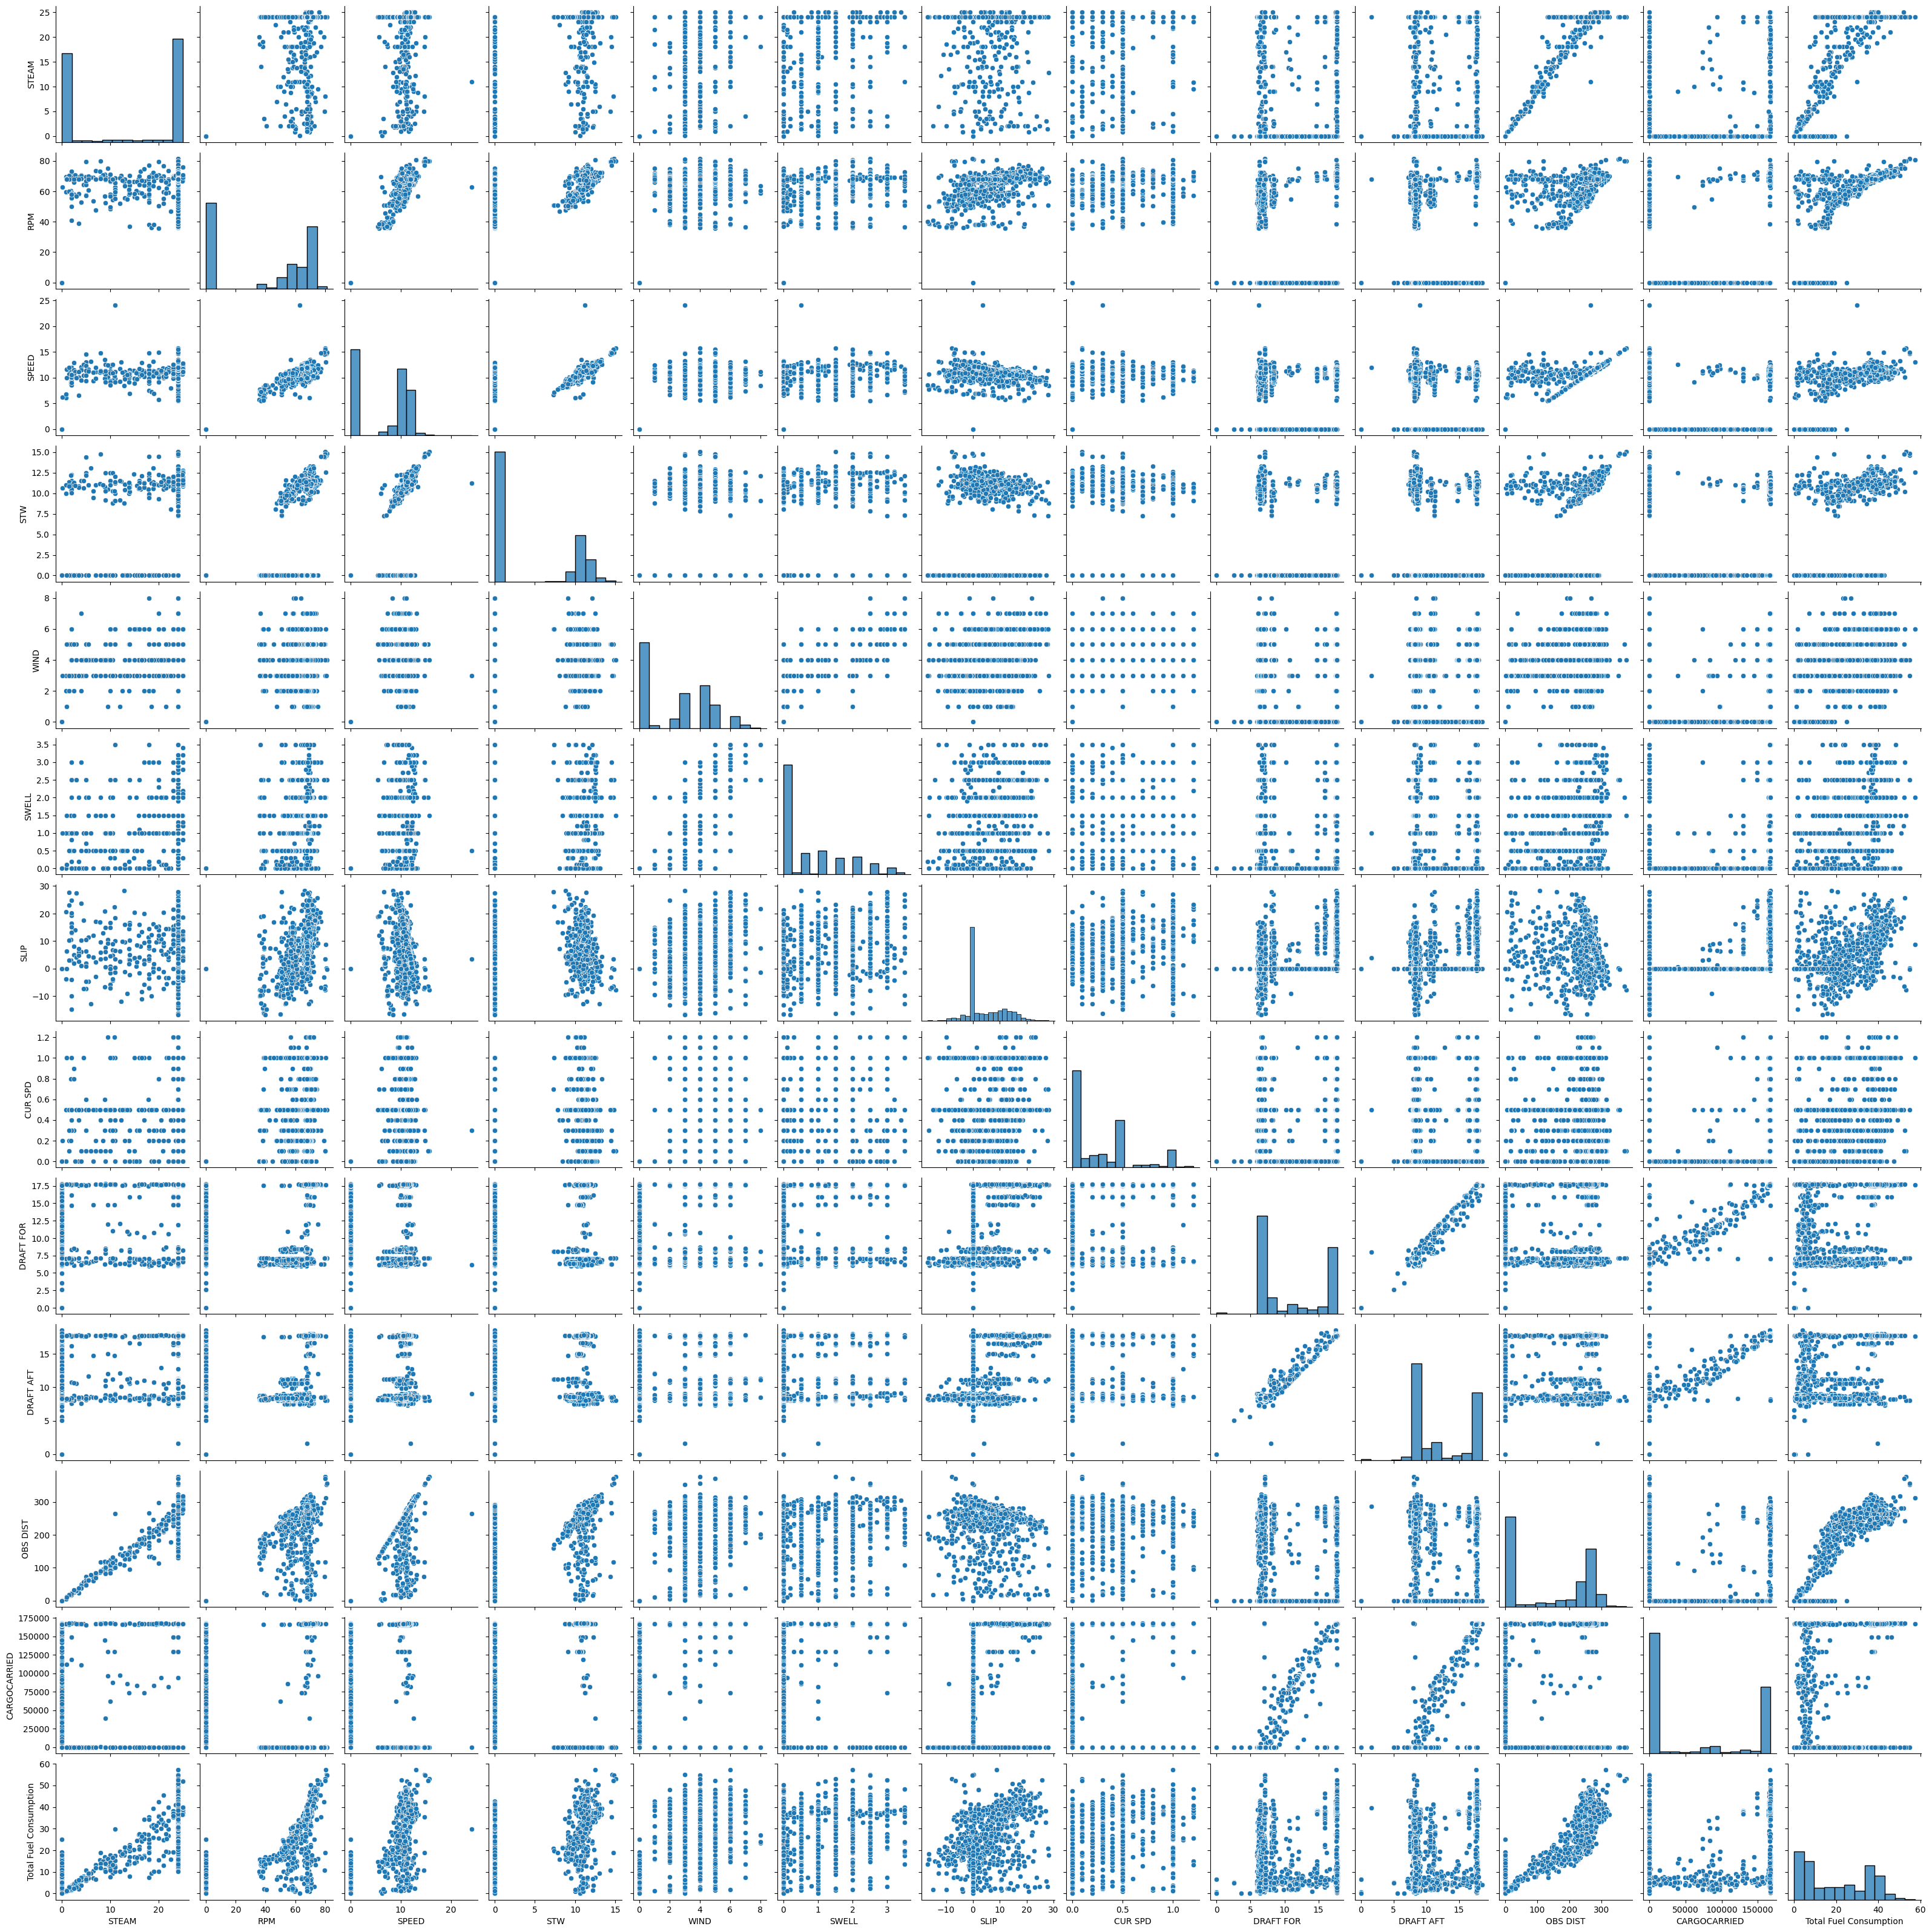

In [139]:
sns.pairplot(df_cpy[numeric_columns].drop(columns={'OPERATION','VOYAGE','TO'}))
plt.show()

# Model Training And Evaluation

In [140]:
def score_table(model,X_test_scaled,y_test):
    y_pred=model.predict(X_test_scaled)
    r2_scores=r2_score(y_test,y_pred)
    mae_score=mean_absolute_error( y_test,y_pred)
    mse_score=mean_squared_error(y_test,y_pred)
    
    compare_table = pd.DataFrame({
        'r2__score': r2_scores,
        'mean_absolute_error': mae_score,
        'mean_squared_error': mse_score
    },index=[1])
    return compare_table

In [141]:
X=df_cpy[numeric_columns].drop(columns=[target,'SPEED','STEAM','SWELL','CARGOCARRIED','SLIP','CUR SPD','VOYAGE','TO','OPERATION'])
y=df_cpy[target]
X.columns

Index(['RPM', 'STW', 'WIND', 'DRAFT FOR', 'DRAFT AFT', 'OBS DIST'], dtype='object')

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Regressor Model

In [144]:
rfr_model = RandomForestRegressor()

In [145]:
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],     
    'min_samples_split': [2, 5, 10, 15],        
    'min_samples_leaf': [1, 2, 4, 6, 8],           
    'max_features': ['sqrt', 'log2',None],      
    'bootstrap': [True, False],                    
}

In [146]:
rfr_model_rs=RandomizedSearchCV(estimator = rfr_model, param_distributions = param_grid, n_iter = 100, cv = 10, n_jobs = -1)
rfr_model_rs.fit(X_train_scaled,y_train)
rfr_model_rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

In [147]:
best_rfr_model=rfr_model_rs.best_estimator_

In [148]:
rfr_model.fit(X_train_scaled,y_train)
print("before hyper paramter tuning: \n",score_table(rfr_model,X_test_scaled,y_test))

before hyper paramter tuning: 
    r2__score  mean_absolute_error  mean_squared_error
1    0.97476             1.602657            5.748905


In [149]:
print("after hyper paramter tuning: \n",score_table(best_rfr_model,X_test_scaled,y_test))

after hyper paramter tuning: 
    r2__score  mean_absolute_error  mean_squared_error
1   0.974845             1.621998             5.72969


## Gradient Boosting Regressor Model

In [150]:
gbr_model = GradientBoostingRegressor()

In [151]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [152]:
gbr_model_rs=RandomizedSearchCV(estimator=gbr_model, param_distributions=param_grid, n_iter = 100, cv = 10, n_jobs = -1)
gbr_model_rs.fit(X_train_scaled,y_train)
gbr_model_rs.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': None,
 'max_depth': 7,
 'learning_rate': 0.01}

In [153]:
best_gbr_model=gbr_model_rs.best_estimator_

In [154]:
gbr_model.fit(X_train_scaled,y_train)
print("before hyper paramter tuning: \n",score_table(gbr_model,X_test_scaled,y_test))

before hyper paramter tuning: 
    r2__score  mean_absolute_error  mean_squared_error
1   0.976173             1.583368            5.427186


In [155]:
print("after hyper paramter tuning: \n",score_table(best_gbr_model,X_test_scaled,y_test))

after hyper paramter tuning: 
    r2__score  mean_absolute_error  mean_squared_error
1   0.977178               1.5503            5.198176


## XGBRegressor Model

In [156]:
xgb_model = xgb.XGBRegressor()

In [157]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 2],
    'scale_pos_weight': [1, 2, 5, 10]
}

In [158]:
xgb_model_rs=RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter = 100, cv = 10, n_jobs = -1)
xgb_model_rs.fit(X_train_scaled,y_train)
xgb_model_rs.best_params_

{'subsample': 0.9,
 'scale_pos_weight': 2,
 'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 1.0}

In [159]:
best_xgb_model=xgb_model_rs.best_estimator_

In [160]:
xgb_model.fit(X_train_scaled,y_train)
print("before hyper paramter tuning: \n",score_table(xgb_model,X_test_scaled,y_test))

before hyper paramter tuning: 
    r2__score  mean_absolute_error  mean_squared_error
1   0.976789             1.522773            5.286875


In [161]:
print("after hyper paramter tuning: \n",score_table(best_xgb_model,X_test_scaled,y_test))

after hyper paramter tuning: 
    r2__score  mean_absolute_error  mean_squared_error
1   0.978196             1.489397             4.96642


# Pickling the best model and the scaler

In [163]:
pickle.dump(best_xgb_model, open('model/model.pkl','wb'))
pickle.dump(scaler, open('scaler/scaler.pkl', 'wb'))